## Problem Statemeent

The financial insistute is looking forward to:

- Determine customers status in the bank with active accounts or not
- provide demographic, financial, and engagement data of bank customers.

## Approach/Solution
- Analyze Customer Demographics
- Understand Financial Performance
- Evaluate Engagement Metrics
- identify Exited vs Active Customers:
- Gain Insights for Predictive Analysis
- identify trends and patterns in customer engagement
- highlighting potential areas for business improvement
- 

## Objective
- Demographic Analysis
- Customer Engagement Patterns
- Financial Performance
- Exited Customers Analysis
- Customer Segmentation

In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as Sb

Cust_info = pd.read_excel('Bank_Churn_Messy.xlsx', sheet_name = 0)
Acct_info = pd. read_excel('Bank_Churn_Messy.xlsx', sheet_name = 1)

In [365]:
Cust_info.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


In [366]:
Acct_info.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


In [367]:
comb_df = pd.merge(Cust_info, Acct_info, on=['CustomerId', 'Tenure'], how='left')

In [368]:
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,No,0


In [369]:
comb_df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,No,1
10000,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,No,0
10001,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,No,0
10002,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,No,0
10003,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,No,0


## Data Exploration

In [370]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure           10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  IsActiveMember   10004 non-null  object 
 12  Exited           10004 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1016.2+ KB


Observation Estimated_Salary is has incorrect datatype

In [371]:
comb_df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'EstimatedSalary', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited'],
      dtype='object')

In [372]:
comb_df.shape

(10004, 13)

Result: Surname and age has incomplete rows

## Data Cleaning

In [373]:
comb_df.isnull().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
Tenure             0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Exited             0
dtype: int64

In [374]:
comb_df['Surname'].value_counts() 

Surname
Smith       32
Walker      31
Martin      29
Scott       29
Brown       26
            ..
Howey        1
Basedow      1
Thomsen      1
Riddle       1
Burbidge     1
Name: count, Length: 2932, dtype: int64

In [375]:
comb_df[comb_df['Surname'].isnull()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
29,15728693,NaN,574,Germany,Female,NaN,3,-€999999,€141349.43,1,Yes,Yes,0
122,15580203,NaN,674,Spain,Male,NaN,6,-€999999,€120193.42,1,No,No,0
9390,15756954,NaN,538,France,Female,NaN,2,-€999999,€0.0,1,Yes,Yes,0


In [376]:
#replace null values with unknown

comb_df['Surname'] = comb_df['Surname'].fillna('Unknown')

In [377]:
comb_df.describe()

,CustomerId,CreditScore,Age,Tenure,NumOfProducts,Exited
count,1.000400e+04,10004.000000,10001.000000,10004.000000,10004.000000,10004.000000
mean,1.569092e+07,650.568073,38.919108,5.012195,1.529988,0.203719
std,7.193218e+04,96.665531,10.488725,2.891806,0.581635,0.402782
min,1.556570e+07,350.000000,18.000000,0.000000,1.000000,0.000000
25%,1.562839e+07,584.000000,32.000000,3.000000,1.000000,0.000000
50%,1.569071e+07,652.000000,37.000000,5.000000,1.000000,0.000000
75%,1.575322e+07,718.000000,44.000000,7.000000,2.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,4.000000,1.000000


In [378]:
#replace null values with the median
#calculates the median value of the Age column. 
#The median is the middle value in a sorted list of numbers and  If there are an even number of values, the median is the average of the two middle values.

comb_df['Age'] = comb_df['Age'].fillna(comb_df['Age'].median())

In [379]:
comb_df['Balance'] = comb_df['Balance'].replace(['€999999', '€-999999', '€0.0'], 0)

In [380]:
comb_df.duplicated().sum()

4

In [381]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10004 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10004 non-null  float64
 6   Tenure           10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  IsActiveMember   10004 non-null  object 
 12  Exited           10004 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1016.2+ KB


## Data Analysis

## 1. Demographic Analysis:
Analyze the distribution of customers based on geography, gender, and age.
Identify any demographic segments (e.g., by geography or gender) that have a significantly different credit score, balance, or other financial metrics.


Obervation: EstimatedSalary and Balance has in correct data type

In [382]:
comb_df['EstimatedSalary'] = comb_df['EstimatedSalary'].str.replace('€', ' ')

In [383]:
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,0,1,Yes,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,€83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,113931.57,€159660.8,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,93826.63,0,2,No,No,0


In [384]:
#The regex=True argument ensures that the replace method works with regular expressions, 
#which is useful for pattern matching, but in this case it's not strictly necessary because we are replacing fixed strings ('€' and ',').

comb_df['Balance'] = comb_df['Balance'].astype(str).replace({'€': '', ',': ''}, regex=True)

In [385]:
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,0,1,Yes,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,113931.57,159660.8,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,93826.63,0,2,No,No,0


In [386]:
comb_df['EstimatedSalary'] = comb_df['EstimatedSalary'].replace(['999999', '-999999', '0.0'], 0)


In [387]:
# Convert to numeric, invalid values will be NaN

comb_df['EstimatedSalary'] = pd.to_numeric(comb_df['EstimatedSalary'], errors='coerce')  
comb_df['Balance'] = pd.to_numeric(comb_df['Balance'], errors='coerce')

In [388]:
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,93826.63,0.00,2,No,No,0


In [389]:
comb_df['Geography'].value_counts()

Geography
Germany    2509
Spain      2477
France     1741
French     1658
FRA        1619
Name: count, dtype: int64

In [390]:
comb_df['Geography'] = comb_df['Geography'].replace('FRA', 'France')

In [391]:
comb_df['Geography'].value_counts()

Geography
France     3360
Germany    2509
Spain      2477
French     1658
Name: count, dtype: int64

In [392]:
cat_columns = [col for col in comb_df.select_dtypes(include='object').columns]

In [393]:
cat_columns

['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [394]:
comb_df['HasCrCard'] = comb_df['HasCrCard'].replace('HasCrCard', 'HasCreditCard')

In [395]:
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
1,15634602,Hargrave,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,15701354,Boni,699,France,Female,39.0,1,93826.63,0.00,2,No,No,0


In [396]:
comb_df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,92888.52,75075.31,2,No,No,1
10000,15628319,Walker,792,French,Female,28.0,4,38190.78,130142.79,1,No,No,0
10001,15628319,Walker,792,French,Female,28.0,4,38190.78,130142.79,1,No,No,0
10002,15628319,Walker,792,French,Female,28.0,4,38190.78,130142.79,1,No,No,0
10003,15628319,Walker,792,French,Female,28.0,4,38190.78,130142.79,1,No,No,0


In [397]:
comb_df['Age'] = comb_df['Age'].astype(int)

In [398]:
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42,2,101348.88,0.00,1,Yes,Yes,1
1,15634602,Hargrave,619,France,Female,42,2,101348.88,0.00,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42,8,113931.57,159660.80,3,No,No,1
4,15701354,Boni,699,France,Female,39,1,93826.63,0.00,2,No,No,0


In [399]:
comb_df['Gender'].value_counts()

Gender
Male      5457
Female    4547
Name: count, dtype: int64

In [400]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10004 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10004 non-null  int32  
 6   Tenure           10004 non-null  int64  
 7   EstimatedSalary  10001 non-null  float64
 8   Balance          10004 non-null  float64
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  IsActiveMember   10004 non-null  object 
 12  Exited           10004 non-null  int64  
dtypes: float64(2), int32(1), int64(5), object(5)
memory usage: 977.1+ KB


In [401]:
comb_df['Geography'].value_counts()

Geography
France     3360
Germany    2509
Spain      2477
French     1658
Name: count, dtype: int64

## Data Mapping

In [402]:
comb_df['IsActiveMember'] = comb_df['IsActiveMember'].map({'Yes': 1, 'No': 0})

In [403]:
comb_df['HasCrCard'] = comb_df['HasCrCard'].map({'Yes': 1, 'No': 0})

In [404]:
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42,2,101348.88,0.00,1,1,1,1
1,15634602,Hargrave,619,France,Female,42,2,101348.88,0.00,1,1,1,1
2,15647311,Hill,608,Spain,Female,41,1,112542.58,83807.86,1,1,1,0
3,15619304,Onio,502,French,Female,42,8,113931.57,159660.80,3,0,0,1
4,15701354,Boni,699,France,Female,39,1,93826.63,0.00,2,0,0,0


## Data Analysis

In [405]:
def generate_bar_plot(x,y, xlabel, ylabel):
    plt.bar(x,y)
    plt.title (f'plot of {ylabel} against {xlabel}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show

In [406]:
comb_df['Geography'].value_counts()

Geography
France     3360
Germany    2509
Spain      2477
French     1658
Name: count, dtype: int64

In [407]:
geo_analysis = comb_df.groupby('Geography')[['CreditScore', 'Balance', 'EstimatedSalary']].mean().reset_index()

In [408]:
geo_analysis

,Geography,CreditScore,Balance,EstimatedSalary
0,France,650.549702,62650.979241,100444.100557
1,French,648.121230,61046.813999,98696.350730
2,Germany,651.453567,119730.116134,101113.804322
3,Spain,651.333872,61818.147763,99440.293453


In [409]:
average_credit_score_by_geography = comb_df.groupby('Geography')['CreditScore'].mean()

In [410]:
average_credit_score_by_geography

Geography
France     650.549702
French     648.121230
Germany    651.453567
Spain      651.333872
Name: CreditScore, dtype: float64

In [411]:
average_credit_score_by_geography = average_credit_score_by_geography.reset_index()

In [412]:
average_credit_score_by_geography = average_credit_score_by_geography.sort_values(by='Geography')

In [413]:
average_credit_score_by_geography = comb_df.groupby('Geography')['CreditScore'].mean().reset_index()

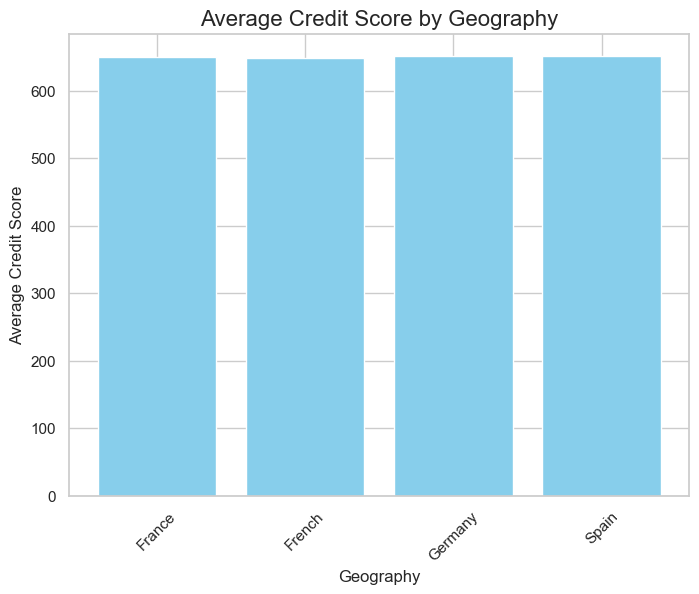

In [414]:
plt.figure(figsize=(8, 6))
plt.bar(average_credit_score_by_geography['Geography'], average_credit_score_by_geography['CreditScore'], color='skyblue')
plt.title('Average Credit Score by Geography', fontsize=16)
plt.xlabel('Geography', fontsize=12)
plt.ylabel('Average Credit Score', fontsize=12)
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()


In [415]:
comb_df[['Gender']].value_counts()

Gender
Male      5457
Female    4547
Name: count, dtype: int64

In [416]:
gender_analysis = comb_df.groupby('Gender')[['CreditScore', 'Balance', 'EstimatedSalary']].mean().reset_index()

In [417]:
gender_analysis

,Gender,CreditScore,Balance,EstimatedSalary
0,Female,650.917528,75678.676571,100565.105776
1,Male,650.276892,77173.974506,99664.491452


C:\Users\WIMBIZ\AppData\Local\Temp\ipykernel_8632\3167402731.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  Sb.barplot(x='Gender', y='Balance', data=gender_analysis, palette='muted', ci='sd')
C:\Users\WIMBIZ\AppData\Local\Temp\ipykernel_8632\3167402731.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  Sb.barplot(x='Gender', y='Balance', data=gender_analysis, palette='muted', ci='sd')


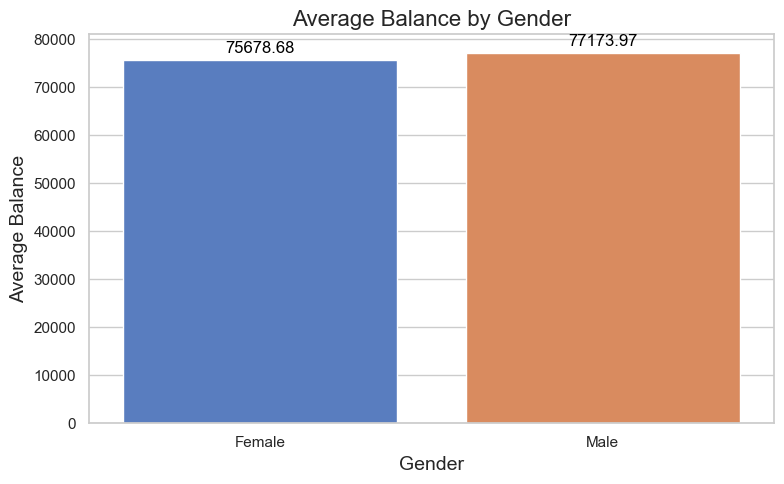

In [418]:
Sb.set(style="whitegrid")

plt.figure(figsize=(8, 5))

Sb.barplot(x='Gender', y='Balance', data=gender_analysis, palette='muted', ci='sd')

ax = plt.gca()  
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 8), textcoords='offset points')

plt.title('Average Balance by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Average Balance', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [419]:
comb_df['Age'].value_counts().sort_index()

Age
18    22
19    27
20    40
21    53
22    84
      ..
83     1
84     2
85     1
88     1
92     2
Name: count, Length: 70, dtype: int64

In [420]:
age_analysis = comb_df.groupby('Age')[['CreditScore', 'Balance', 'EstimatedSalary']].mean().reset_index()

In [421]:
age_analysis

,Age,CreditScore,Balance,EstimatedSalary
0,18,686.681818,79169.57500,85102.389545
1,19,665.629630,70502.53963,97734.100370
2,20,665.050000,76038.89000,97705.542000
3,21,647.283019,75926.88283,102536.673774
4,22,636.547619,68213.74881,98321.615476
...,...,...,...,...
65,83,678.000000,123356.63000,92934.410000
66,84,472.500000,90057.86500,187360.250000
67,85,787.000000,0.00000,116537.960000
68,88,513.000000,0.00000,52952.240000


In [422]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 100]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '60+']

In [423]:
age_analysis['AgeGroup'] = pd.cut(age_analysis['Age'], bins=age_bins, labels=age_labels, right=False)

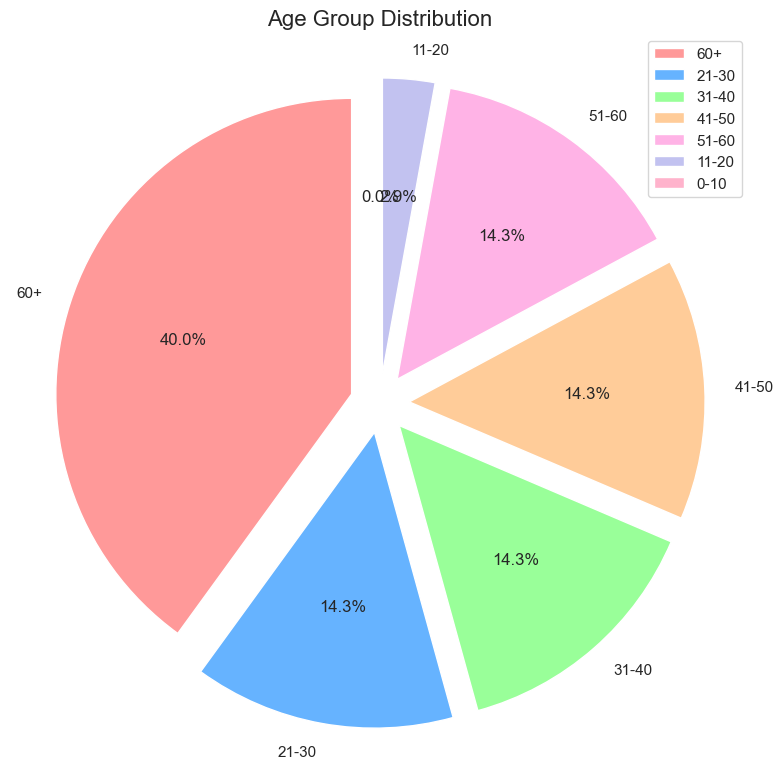

In [424]:
plt.figure(figsize=(8, 8))
age_group_counts = age_analysis['AgeGroup'].value_counts()
explode = [0.1] * len(age_group_counts)

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ffb3e6', '#c2c2f0', '#ffb3cc']
age_group_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, legend=True)

plt.title('Age Group Distribution', fontsize=16)
plt.ylabel('') 

plt.gca().set_ylabel('')  
plt.tight_layout()

## 2. Customer Engagement Patterns

Investigate the relationship between customer tenure and engagement (such as the number of products owned, HasCrCard, and IsActiveMember).

Analyze the impact of tenure on customer behavior, especially focusing on long-term customer patterns 

(e.g., do longer-tenured customers tend to hold more products or have higher balances?).

In [425]:
comb_df['Tenure'].value_counts()

Tenure
2     1049
1     1035
7     1028
8     1025
5     1012
3     1009
4      992
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [426]:
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42,2,101348.88,0.00,1,1,1,1
1,15634602,Hargrave,619,France,Female,42,2,101348.88,0.00,1,1,1,1
2,15647311,Hill,608,Spain,Female,41,1,112542.58,83807.86,1,1,1,0
3,15619304,Onio,502,French,Female,42,8,113931.57,159660.80,3,0,0,1
4,15701354,Boni,699,France,Female,39,1,93826.63,0.00,2,0,0,0


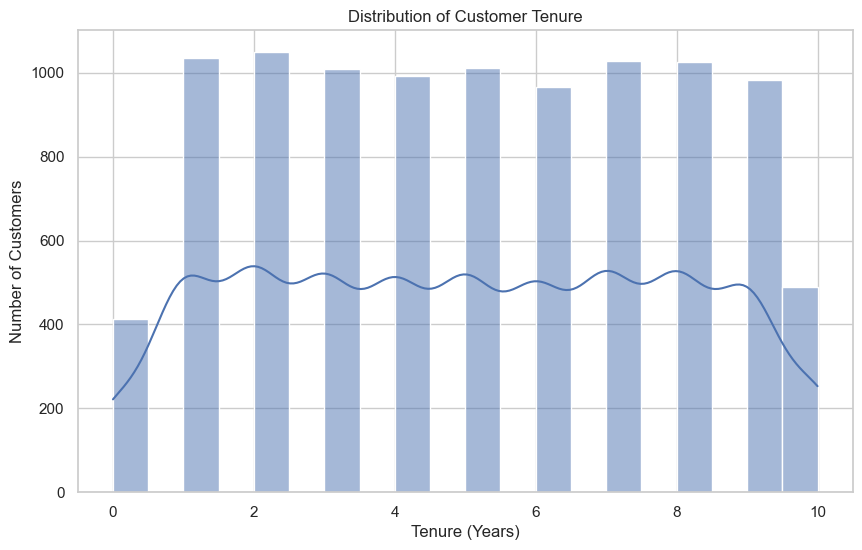

In [427]:
plt.figure(figsize=(10, 6))
Sb.histplot(comb_df['Tenure'], kde=True, bins=20) #Kernel Density Estimate (KDE) plot on top of the histogram.
#The bins parameter controls how many bars (or "bins") are used to divide the range of data into intervals. Each bin represents a range of values in the dataset.
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Number of Customers')
plt.show()

In [428]:
tenure_product_analysis = comb_df.groupby('Tenure')['NumOfProducts'].mean().reset_index()

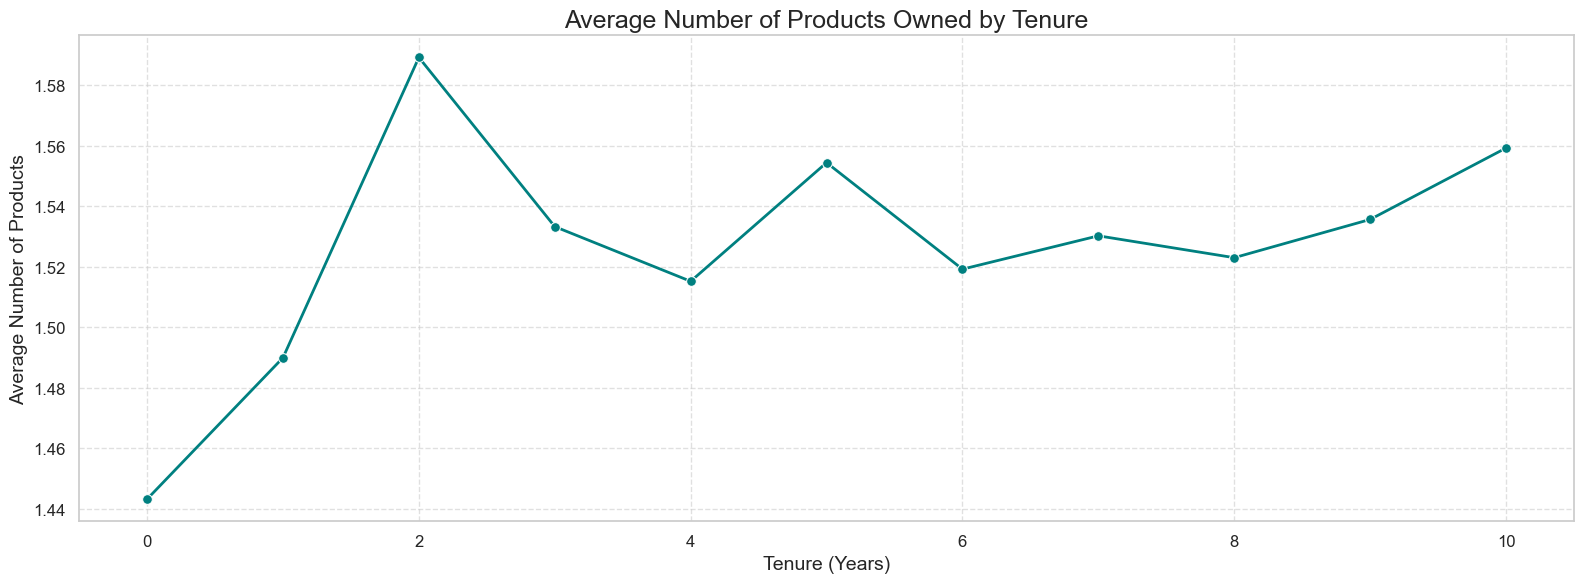

In [429]:
Sb.set(style="whitegrid")

# Create the figure with a larger size for readability
plt.figure(figsize=(16, 6))

# Create the line plot with markers
Sb.lineplot(x='Tenure', y='NumOfProducts', data=tenure_product_analysis, 
             marker='o', color='teal', lw=2, markersize=7)

# Set the title and labels with larger font size
plt.title('Average Number of Products Owned by Tenure', fontsize=18)
plt.xlabel('Tenure (Years)', fontsize=14)
plt.ylabel('Average Number of Products', fontsize=14)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Increase font size for tick labels
plt.tick_params(axis='both', labelsize=12)

# Show the plot with tight layout for proper spacing
plt.tight_layout()

# Display the plot
plt.show()

In [430]:
credit_card_analysis = comb_df.groupby('Tenure')['HasCrCard'].mean().reset_index()

In [431]:
comb_df.groupby('Tenure')['HasCrCard'].sum()

Tenure
0     219
1     569
2     561
3     524
4     500
5     506
6     499
7     535
8     519
9     471
10    249
Name: HasCrCard, dtype: int64

In [432]:
comb_df.groupby('Tenure')['IsActiveMember'].sum()

Tenure
0     219
1     569
2     561
3     524
4     500
5     506
6     499
7     535
8     519
9     471
10    249
Name: IsActiveMember, dtype: int64

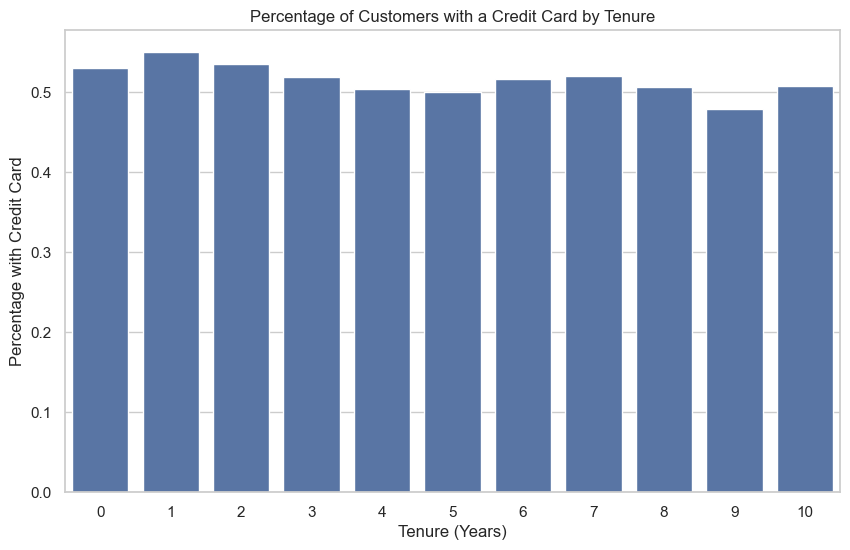

In [433]:
plt.figure(figsize=(10, 6))
Sb.barplot(x='Tenure', y='HasCrCard', data=credit_card_analysis)
plt.title('Percentage of Customers with a Credit Card by Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Percentage with Credit Card')
plt.show()

In [434]:
active_member_analysis = pd.DataFrame(comb_df)

In [435]:
active_member_analysis.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42,2,101348.88,0.00,1,1,1,1
1,15634602,Hargrave,619,France,Female,42,2,101348.88,0.00,1,1,1,1
2,15647311,Hill,608,Spain,Female,41,1,112542.58,83807.86,1,1,1,0
3,15619304,Onio,502,French,Female,42,8,113931.57,159660.80,3,0,0,1
4,15701354,Boni,699,France,Female,39,1,93826.63,0.00,2,0,0,0


In [436]:
active_member_analysis['Tenure'] = active_member_analysis['Tenure'].round().astype(int)

In [437]:
comb_df.groupby('Tenure')['IsActiveMember'].sum()

Tenure
0     219
1     569
2     561
3     524
4     500
5     506
6     499
7     535
8     519
9     471
10    249
Name: IsActiveMember, dtype: int64

In [438]:
active_member_analysis = comb_df.groupby('Tenure')['IsActiveMember'].mean().reset_index()

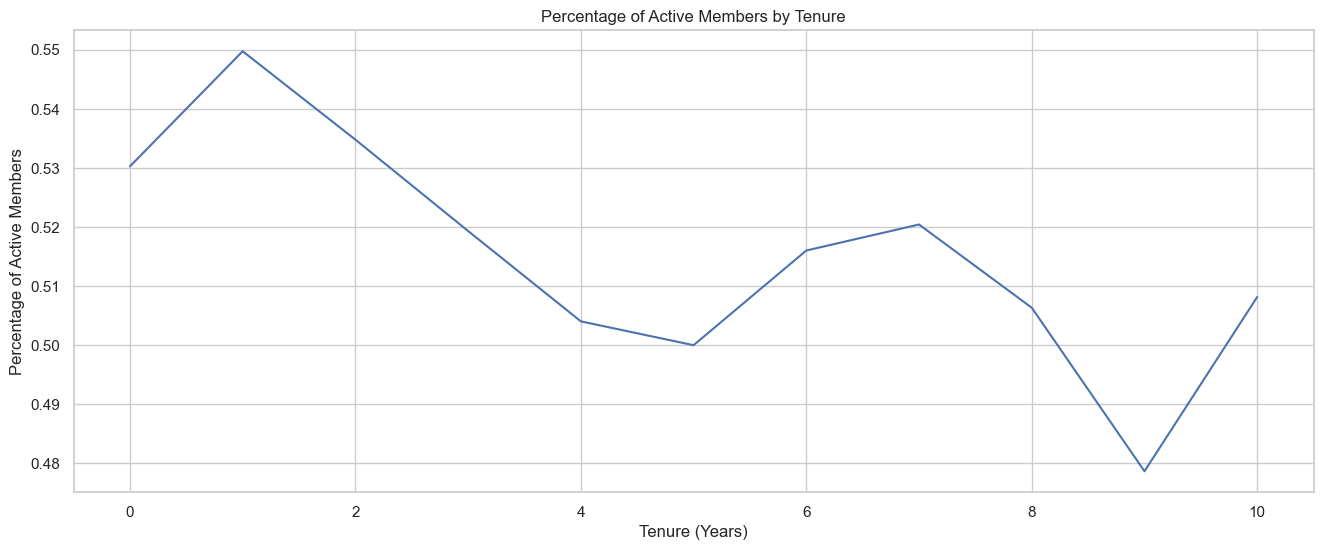

In [439]:
plt.figure(figsize=(16, 6))
Sb.lineplot(x='Tenure', y='IsActiveMember', data=active_member_analysis)
plt.title('Percentage of Active Members by Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Percentage of Active Members')
plt.show()

## Financial Performance:
Explore credit score distribution and identify which customer segments (e.g., age, gender, geography) tend to have higher or lower credit scores.
Analyze customer balance and estimated salary patterns and compare them across different demographic groups.


In [440]:
comb_df.groupby('Tenure')['CreditScore'].sum()

Tenure
0     269294
1     671515
2     684787
3     656385
4     646712
5     658334
6     626017
7     667795
8     663943
9     643180
10    320321
Name: CreditScore, dtype: int64

In [441]:
comb_df['CreditScore'] = comb_df['CreditScore'].round()

In [442]:
Tenure_credit_score_analysis = comb_df.groupby('Tenure')['CreditScore'].mean().reset_index()

In [443]:
comb_df.groupby('Tenure')['Balance'].sum()

Tenure
0     32989990.09
1     81304822.67
2     80527928.54
3     78367072.42
4     73635169.10
5     77361612.23
6     71948612.53
7     77667080.19
8     79885013.21
9     75337543.31
10    36224476.96
Name: Balance, dtype: float64

In [444]:
comb_df['Balance'] = comb_df['Balance'].round()

In [445]:
Tenure_balance_analysis = comb_df.groupby('Tenure')['Balance'].mean().reset_index()

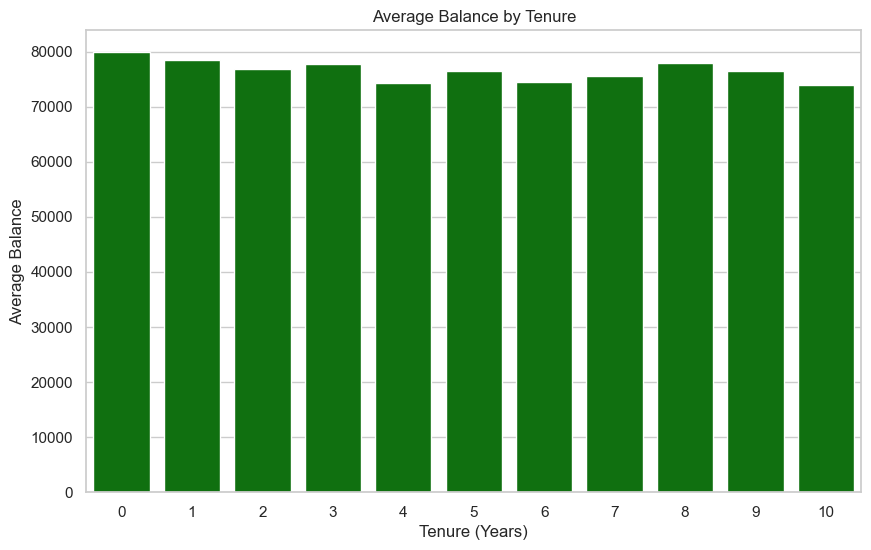

In [446]:
plt.figure(figsize=(10, 6))
sorted_tenure = Tenure_credit_score_analysis.sort_values(by='Tenure', ascending=True)
Sb.barplot(x='Tenure', y='Balance', data=Tenure_balance_analysis, color= 'Green')
plt.title('Average Balance by Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Average Balance')
plt.show()

In [447]:
def categorize_customer(tenure):
    if tenure < 5:
        return 'Short Term'
    else:
        return 'Long Term'

comb_df['CustomerType'] = comb_df['Tenure'].apply(categorize_customer)

In [448]:
comb_df[['Tenure', 'CustomerType']].head()

,Tenure,CustomerType
0,2,Short Term
1,2,Short Term
2,1,Short Term
3,8,Long Term
4,1,Short Term


In [449]:
Tenure_summary = comb_df.groupby('Tenure')[['CreditScore', 'Balance', 'NumOfProducts']].mean()

In [450]:
short_term_customers = comb_df[comb_df['Tenure'] < 5]

In [451]:
short_term_customers[['CreditScore', 'Balance', 'NumOfProducts']].count()

CreditScore      4498
Balance          4498
NumOfProducts    4498
dtype: int64

In [452]:
long_term_customers = comb_df[comb_df['Tenure'] > 5]

In [453]:
long_term_customers[['CreditScore', 'Balance', 'NumOfProducts']].count()

CreditScore      4494
Balance          4494
NumOfProducts    4494
dtype: int64

In [454]:
tenure_counts = short_term_customers['Tenure'].value_counts().sort_index()

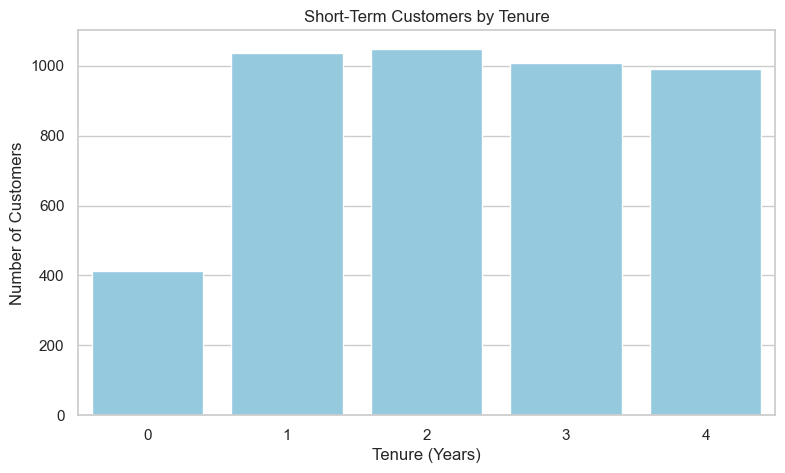

In [455]:
plt.figure(figsize=(9, 5))
Sb.barplot(x=tenure_counts.index, y=tenure_counts.values, color='skyblue')  # 'x' = Tenure, 'y' = count of customers
plt.title('Short-Term Customers by Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Number of Customers')
plt.show()

In [456]:
long_term_customers = comb_df[comb_df['Tenure'] >= 5]

In [457]:
tenure_range_counts = long_term_customers['Tenure'].value_counts().sort_index()

In [458]:
comb_df['Tenure'].describe()

count    10004.000000
mean         5.012195
std          2.891806
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

In [459]:
tenure_counts = comb_df['Tenure'].value_counts().sort_index()

In [460]:
bins = [5, 6, 7, 8, 9, 10]  # Define your own bins
tenure_labels = ['5-6 years', '6-7years', '7-8 years', '8-9 years', '9-10years']

# Create a new 'TenureBin' column based on the 'Tenure' column using pd.cut()
comb_df['TenureBin'] = pd.cut(comb_df['Tenure'], bins=bins, labels=tenure_labels, right=False)

tenure_counts = comb_df['TenureBin'].value_counts().sort_index()

C:\Users\WIMBIZ\AppData\Local\Temp\ipykernel_8632\704441679.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  Sb.barplot(x=tenure_counts.index, y=tenure_counts.values, palette='Blues_d')


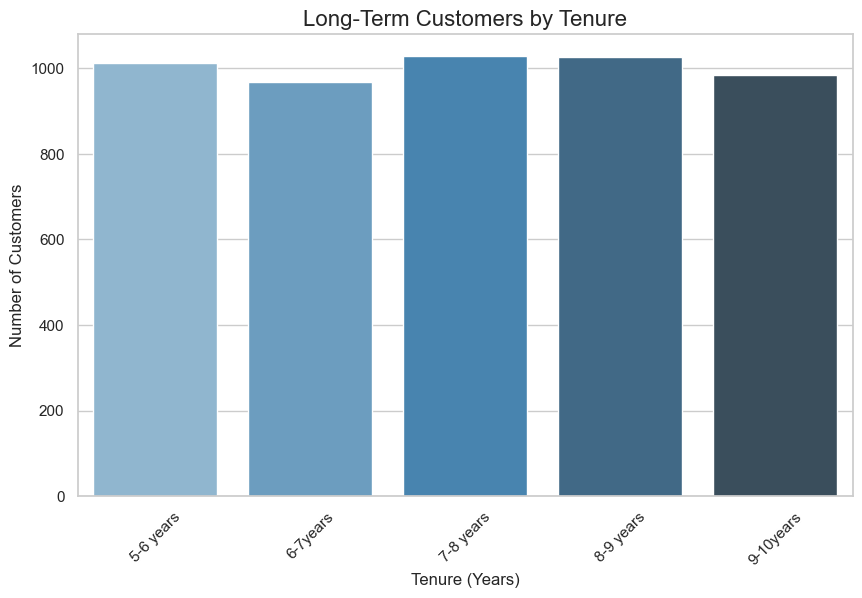

In [461]:
plt.figure(figsize=(10, 6))
Sb.barplot(x=tenure_counts.index, y=tenure_counts.values, palette='Blues_d')

# Add titles and labels
plt.title('Long-Term Customers by Tenure', fontsize=16)
plt.xlabel('Tenure (Years)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Show the plot
plt.xticks(rotation=45)  # Rotate x labels for better visibility if needed
plt.show()

## Exited Customers Analysis:
Compare the financial and demographic characteristics of customers who exited the bank versus those who remain active.
Identify possible factors (e.g., age, credit score, balance) associated with customers exiting the bank.


In [462]:
age_bins = [0, 18, 30, 40, 50, 60, 100]
age_labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '60+']

# Create AgeGroup column if missing
comb_df['AgeGroup'] = pd.cut(comb_df['Age'], bins=age_bins, labels=age_labels, right=False)


In [463]:
comb_df[['Surname', 'Age', 'AgeGroup']]


,Surname,Age,AgeGroup
0,Hargrave,42,41-50
1,Hargrave,42,41-50
2,Hill,41,41-50
3,Onio,42,41-50
4,Boni,39,31-40
...,...,...,...
9999,Sabbatini,42,41-50
10000,Walker,28,19-30
10001,Walker,28,19-30
10002,Walker,28,19-30


C:\Users\WIMBIZ\AppData\Local\Temp\ipykernel_8632\3976361638.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_avg_score = comb_df.groupby('AgeGroup')['CreditScore'].mean().sort_values()


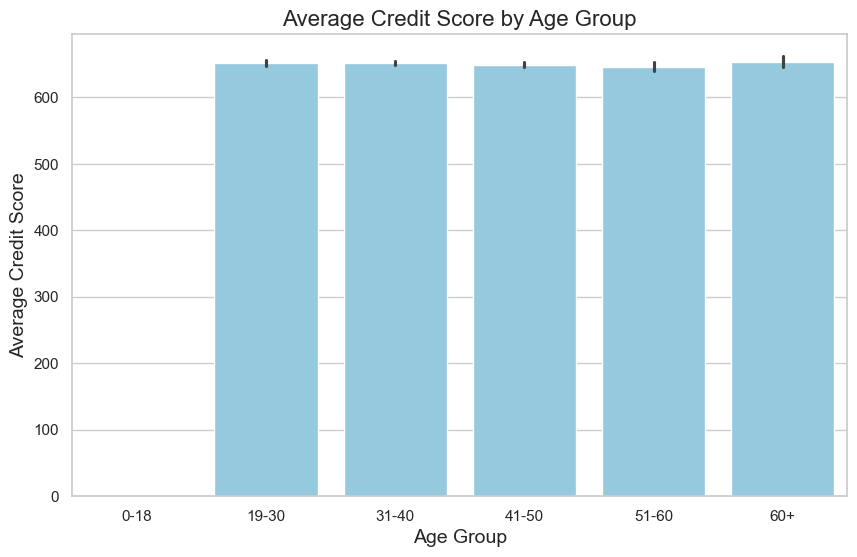

In [464]:
plt.figure(figsize=(10, 6))
age_group_avg_score = comb_df.groupby('AgeGroup')['CreditScore'].mean().sort_values()
Sb.barplot(data=comb_df, x='AgeGroup', y='CreditScore', color='skyblue')


# Add title and labels
plt.title('Average Credit Score by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Average Credit Score', fontsize=14)

# Show the plot
plt.show()

In [465]:
comb_df[['Gender', 'CreditScore']].isnull().sum()

Gender         0
CreditScore    0
dtype: int64

In [466]:
avg_credit_score_by_gender = comb_df.groupby('Gender')['CreditScore'].mean()

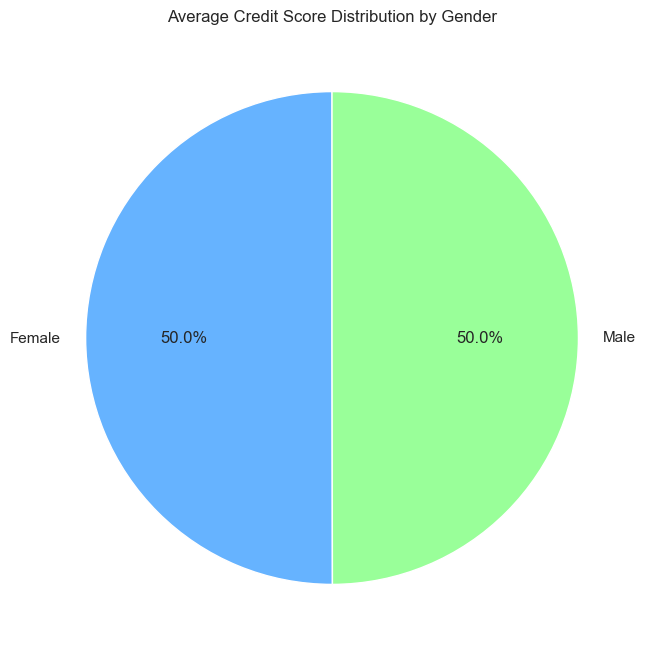

In [467]:
plt.figure(figsize=(8, 8))
plt.pie(avg_credit_score_by_gender, labels=avg_credit_score_by_gender.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Average Credit Score Distribution by Gender')

plt.show()

In [468]:
comb_df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,CustomerType,TenureBin,AgeGroup
9999,15682355,Sabbatini,772,Germany,Male,42,3,92888.52,75075.0,2,0,0,1,Short Term,NaN,41-50
10000,15628319,Walker,792,French,Female,28,4,38190.78,130143.0,1,0,0,0,Short Term,NaN,19-30
10001,15628319,Walker,792,French,Female,28,4,38190.78,130143.0,1,0,0,0,Short Term,NaN,19-30
10002,15628319,Walker,792,French,Female,28,4,38190.78,130143.0,1,0,0,0,Short Term,NaN,19-30
10003,15628319,Walker,792,French,Female,28,4,38190.78,130143.0,1,0,0,0,Short Term,NaN,19-30


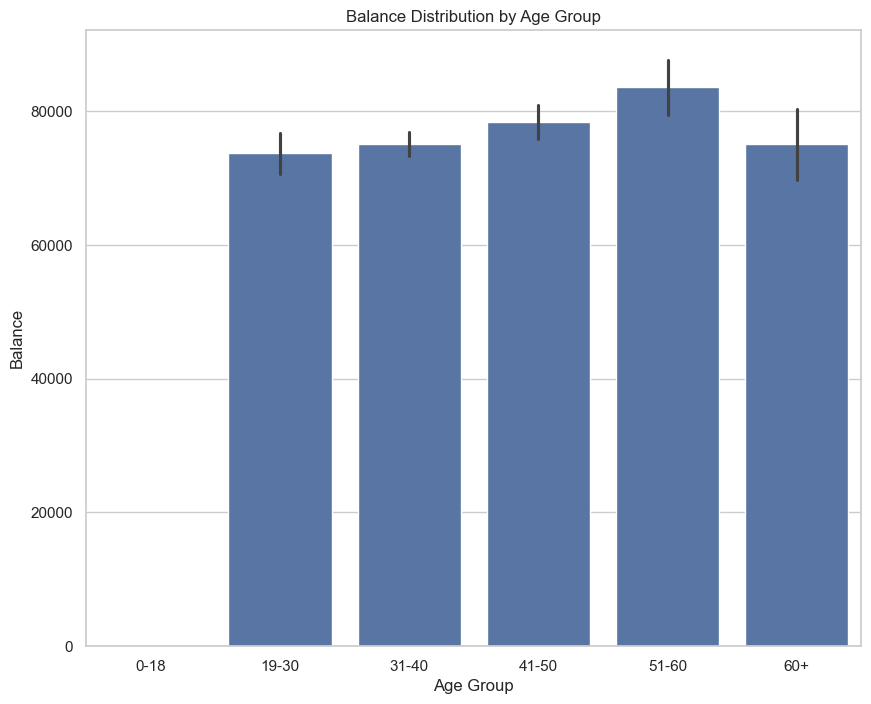

In [469]:
# Balance distribution by Age group
plt.figure(figsize=(10, 8))
Sb.barplot(x='AgeGroup', y='Balance', data=comb_df)
plt.title('Balance Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Balance')
plt.show()

In [478]:
gender_balance = comb_df.groupby('Gender')['Balance'].sum()

In [487]:
comb_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,CustomerType,TenureBin,AgeGroup
0,15634602,Hargrave,619,France,Female,42,2,101348.88,0.0,1,1,1,1,Short Term,NaN,41-50
1,15634602,Hargrave,619,France,Female,42,2,101348.88,0.0,1,1,1,1,Short Term,NaN,41-50
2,15647311,Hill,608,Spain,Female,41,1,112542.58,83808.0,1,1,1,0,Short Term,NaN,41-50
3,15619304,Onio,502,French,Female,42,8,113931.57,159661.0,3,0,0,1,Long Term,8-9 years,41-50
4,15701354,Boni,699,France,Female,39,1,93826.63,0.0,2,0,0,0,Short Term,NaN,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,15682355,Sabbatini,772,Germany,Male,42,3,92888.52,75075.0,2,0,0,1,Short Term,NaN,41-50
10000,15628319,Walker,792,French,Female,28,4,38190.78,130143.0,1,0,0,0,Short Term,NaN,19-30
10001,15628319,Walker,792,French,Female,28,4,38190.78,130143.0,1,0,0,0,Short Term,NaN,19-30
10002,15628319,Walker,792,French,Female,28,4,38190.78,130143.0,1,0,0,0,Short Term,NaN,19-30


In [486]:
gender_balance

Gender
Female    344110968.0
Male      421138392.0
Name: Balance, dtype: float64

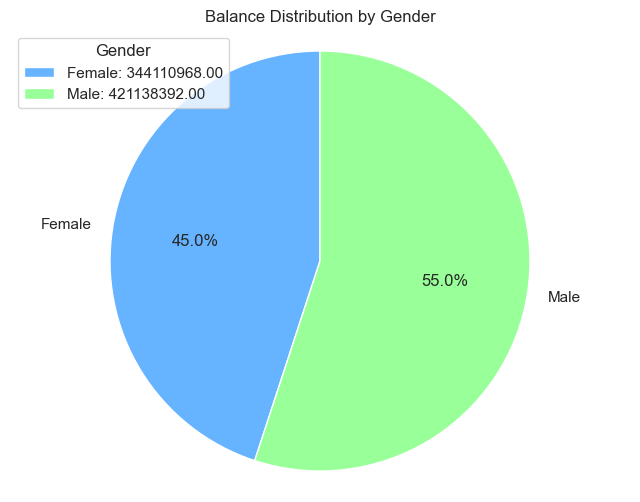

In [489]:
#Creating the pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_balance, labels=gender_balance.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Balance Distribution by Gender')
labels = [f"{gender}: {balance:.2f}" for gender, balance in zip(gender_balance.index, gender_balance.values)]
plt.legend(labels=labels, title="Gender", loc="upper left")
plt.axis('equal')
plt.show()

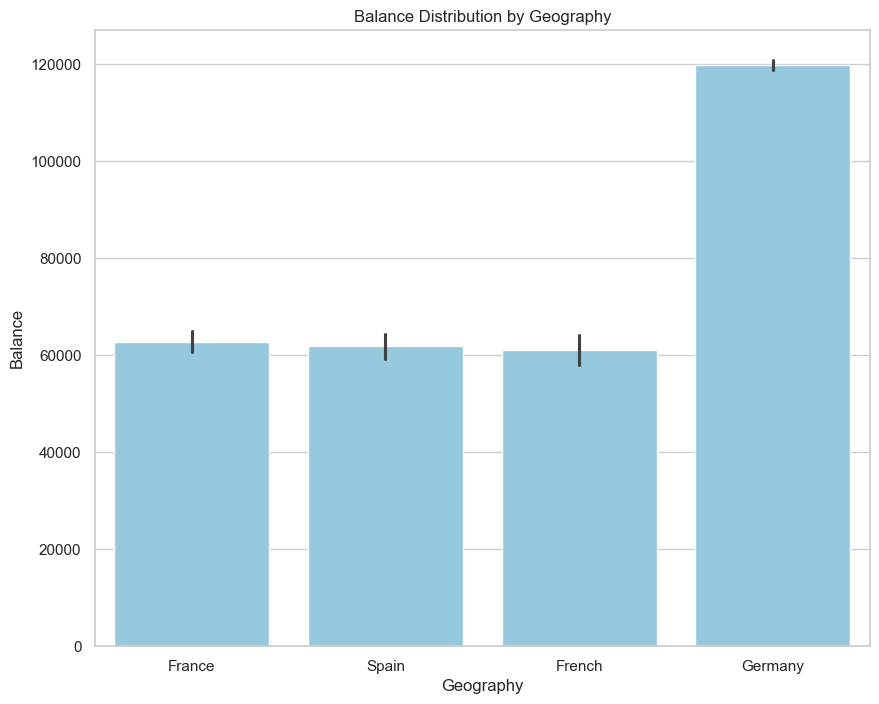

In [491]:
# Balance distribution by Geography
plt.figure(figsize=(10, 8))
Sb.barplot(x='Geography', y='Balance', data=comb_df, color='skyblue')
plt.title('Balance Distribution by Geography')
plt.xlabel('Geography')
plt.ylabel('Balance')
plt.show()

In [492]:
comb_df.groupby('Gender')['EstimatedSalary'].sum()

Gender
Female    4.570684e+08
Male      5.437695e+08
Name: EstimatedSalary, dtype: float64

C:\Users\WIMBIZ\AppData\Local\Temp\ipykernel_8632\1402130680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comb_df['EstimatedSalary'] = pd.to_numeric(comb_df['EstimatedSalary'], errors='coerce')  # Convert to numeric, invalid values become NaN
C:\Users\WIMBIZ\AppData\Local\Temp\ipykernel_8632\1402130680.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  Sb.barplot(x='Gender', y='EstimatedSalary', data=comb_df, palette='Set2')


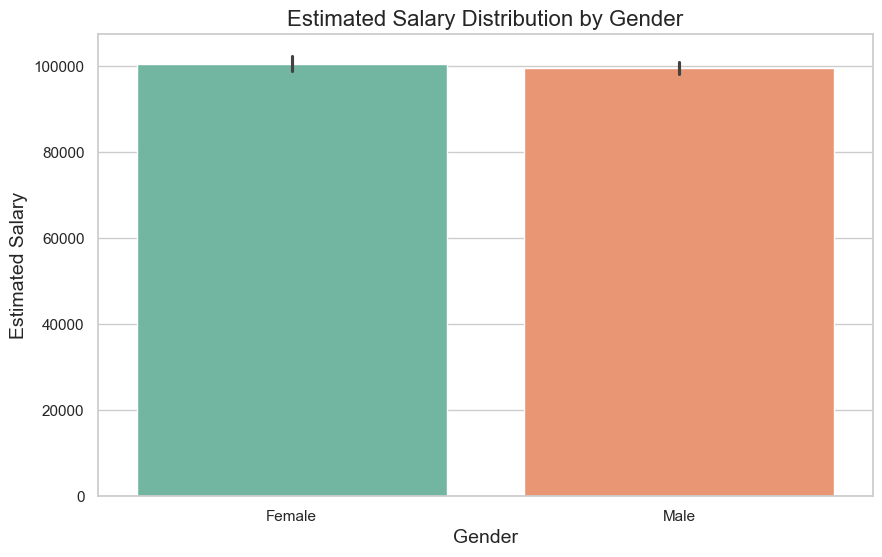

In [497]:
comb_df['EstimatedSalary'] = pd.to_numeric(comb_df['EstimatedSalary'], errors='coerce')  # Convert to numeric, invalid values become NaN
comb_df = comb_df.dropna(subset=['EstimatedSalary'])  # Drop rows where 'EstimatedSalary' is NaN

# Create the barplot
plt.figure(figsize=(10, 6))
Sb.barplot(x='Gender', y='EstimatedSalary', data=comb_df, palette='Set2')

# Add title and labels
plt.title('Estimated Salary Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Estimated Salary', fontsize=14)

# Show the plot
plt.show()

In [498]:
comb_df.groupby('Geography')['EstimatedSalary'].sum()

Geography
France     3.373917e+08
French     1.636385e+08
Germany    2.535934e+08
Spain      2.462142e+08
Name: EstimatedSalary, dtype: float64

C:\Users\WIMBIZ\AppData\Local\Temp\ipykernel_8632\1403721800.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  Sb.barplot(x='Geography', y='EstimatedSalary', data=comb_df, palette='viridis')


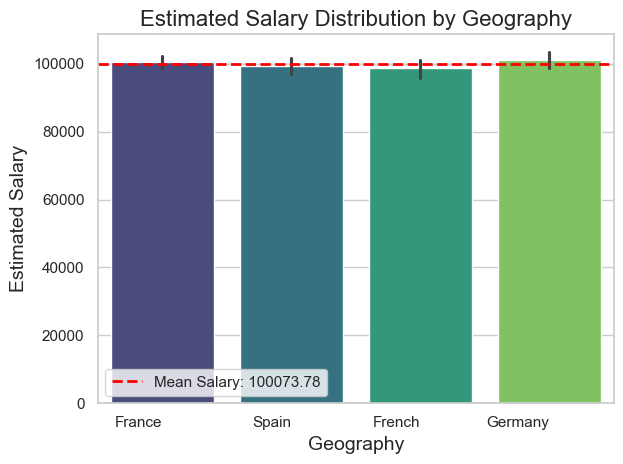

In [499]:
Sb.barplot(x='Geography', y='EstimatedSalary', data=comb_df, palette='viridis')

plt.title('Estimated Salary Distribution by Geography', fontsize=16)
plt.xlabel('Geography', fontsize=14)
plt.ylabel('Estimated Salary', fontsize=14)

mean_salary = comb_df['EstimatedSalary'].mean()
plt.axhline(mean_salary, color='red', linestyle='--', linewidth=2, label=f'Mean Salary: {mean_salary:.2f}')

plt.xticks(rotation=0, ha='right')

plt.legend()
plt.tight_layout()
plt.show()

In [500]:
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,CustomerType,TenureBin,AgeGroup
0,15634602,Hargrave,619,France,Female,42,2,101348.88,0.0,1,1,1,1,Short Term,NaN,41-50
1,15634602,Hargrave,619,France,Female,42,2,101348.88,0.0,1,1,1,1,Short Term,NaN,41-50
2,15647311,Hill,608,Spain,Female,41,1,112542.58,83808.0,1,1,1,0,Short Term,NaN,41-50
3,15619304,Onio,502,French,Female,42,8,113931.57,159661.0,3,0,0,1,Long Term,8-9 years,41-50
4,15701354,Boni,699,France,Female,39,1,93826.63,0.0,2,0,0,0,Short Term,NaN,31-40


## Customer Segmentation:
Based on the available data, identify distinct customer segments (e.g., high-balance vs. low-balance customers) and analyze their unique characteristics.
Provide insights into how the bank could optimize its services for each segment, such as offering tailored products to certain demographics or improving engagement with less active members.


In [501]:
def credit_score_category(score):
    if score >= 700:
        return 'High'
    elif score >= 600:
        return 'Medium'
    else:
        return 'Low'

comb_df['CreditScoreCategory'] = comb_df['CreditScore'].apply(credit_score_category)

In [502]:
comb_df['CreditScoreCategory'].value_counts()

CreditScoreCategory
Medium    3818
High      3151
Low       3032
Name: count, dtype: int64

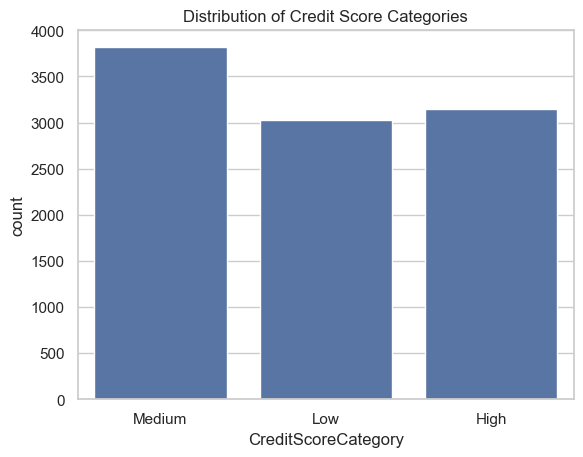

In [503]:
Sb.countplot(data=comb_df, x='CreditScoreCategory')
plt.title('Distribution of Credit Score Categories')
plt.show()

In [505]:
comb_df['Balance'] = pd.to_numeric(comb_df['Balance'], errors='coerce')

In [506]:
median_balance = comb_df['Balance'].median()

In [508]:
def balance_category(balance):
    if balance >= median_balance:
        return 'High Balance'
    else:
        return 'Low Balance'

comb_df['BalanceCategory'] = comb_df['Balance'].apply(balance_category)

In [509]:
comb_df['Balance'].describe()

count     10001.000000
mean      76491.132687
std       62396.308033
min           0.000000
25%           0.000000
50%       97208.000000
75%      127655.000000
max      250898.000000
Name: Balance, dtype: float64

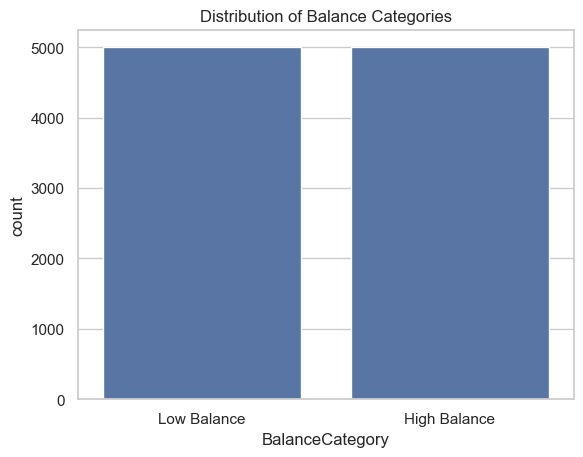

In [510]:
Sb.countplot(data=comb_df, x='BalanceCategory')
plt.title('Distribution of Balance Categories')
plt.show()

In [ ]:
def age_group(age):
    if age < 31:
        return 'Young Adult (18-30)'
    elif 31 <= age <= 50:
        return 'Mid-Life Adult (31-50)'
    else:
        return 'Older Adult (51+)'

comb_df['AgeGroup'] = comb_df['Age'].apply(age_group)

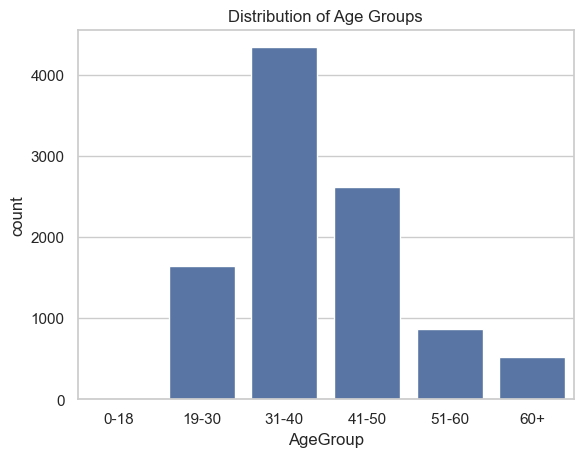

In [511]:
Sb.countplot(data=comb_df, x='AgeGroup')
plt.title('Distribution of Age Groups')
plt.show()

In [512]:
comb_df['IsActiveMember'].value_counts()

IsActiveMember
1    5150
0    4851
Name: count, dtype: int64

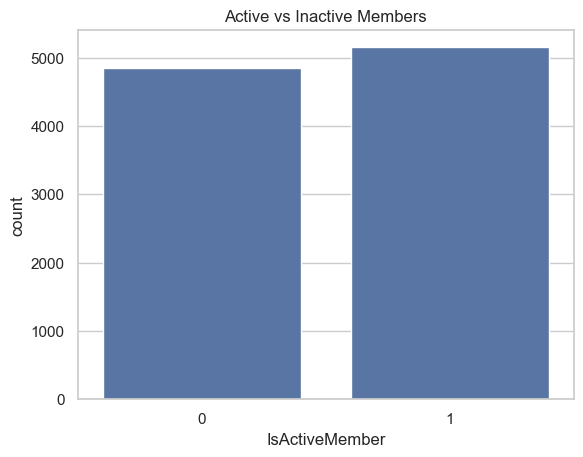

In [513]:
Sb.countplot(data=comb_df, x='IsActiveMember')
plt.title('Active vs Inactive Members')
plt.show()

In [514]:
def customer_type(tenure):
    if tenure <= 3:
        return 'Short Term'
    else:
        return 'Long Term'

comb_df['CustomerType'] = comb_df['Tenure'].apply(customer_type)

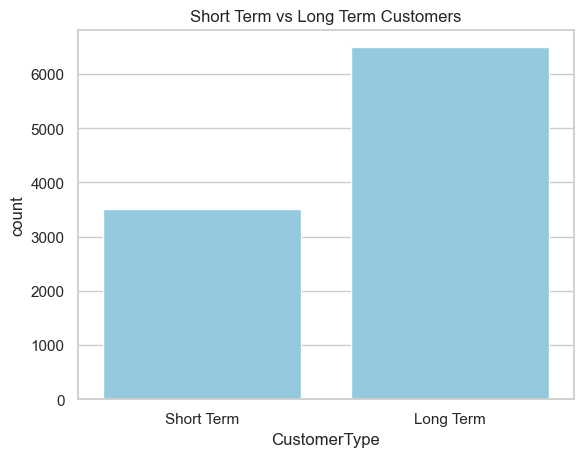

In [517]:
Sb.countplot(data=comb_df, x='CustomerType', color='skyblue')
plt.title('Short Term vs Long Term Customers')
plt.show()

In [519]:
comb_df['CustomerSegment'] = (
    comb_df['CreditScoreCategory'].astype(str) + ' | ' +
    comb_df['BalanceCategory'].astype(str) + ' | ' +
    comb_df['AgeGroup'].astype(str) + ' | ' +
    comb_df['CustomerType'].astype(str)
)

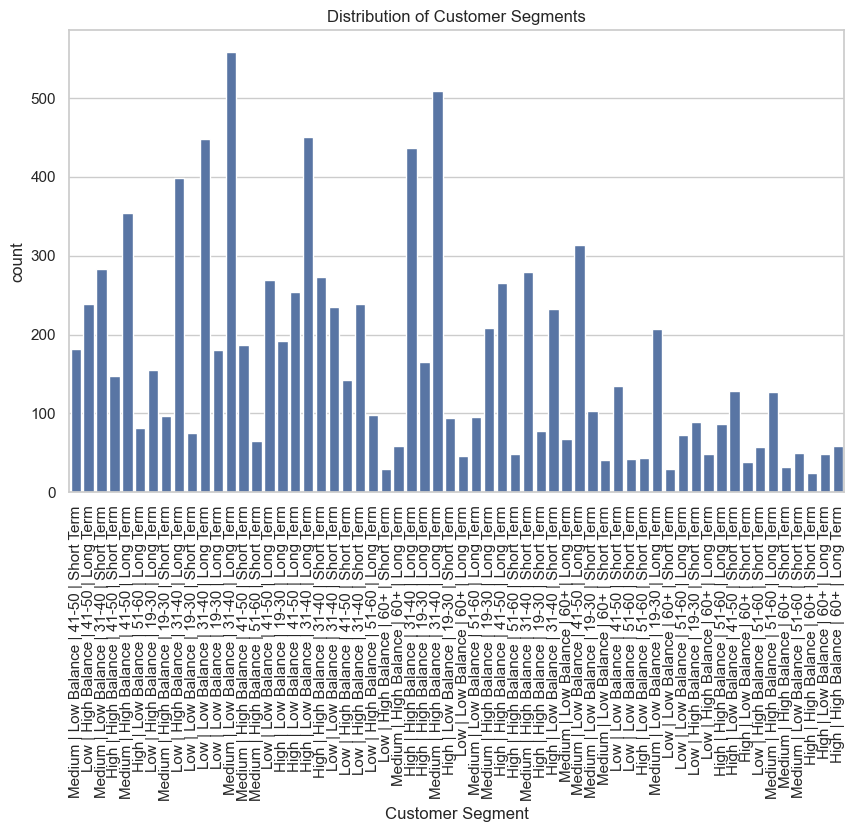

In [520]:
plt.figure(figsize=(10, 6))
Sb.countplot(data=comb_df, x='CustomerSegment')
plt.title('Distribution of Customer Segments')
plt.xlabel('Customer Segment')
plt.xticks(rotation=90)
plt.show()

In [523]:
churn_by_segment = comb_df.groupby('CustomerSegment')['Exited'].mean()

In [524]:
churn_by_segment

CustomerSegment
High | High Balance | 19-30 | Long Term       0.145455
High | High Balance | 19-30 | Short Term      0.076923
High | High Balance | 31-40 | Long Term       0.157895
High | High Balance | 31-40 | Short Term      0.124542
High | High Balance | 41-50 | Long Term       0.368421
High | High Balance | 41-50 | Short Term      0.319728
High | High Balance | 51-60 | Long Term       0.643678
High | High Balance | 51-60 | Short Term      0.571429
High | High Balance | 60+ | Long Term         0.338983
High | High Balance | 60+ | Short Term        0.560000
High | Low Balance | 19-30 | Long Term        0.026042
High | Low Balance | 19-30 | Short Term       0.053191
High | Low Balance | 31-40 | Long Term        0.053215
High | Low Balance | 31-40 | Short Term       0.081545
High | Low Balance | 41-50 | Long Term        0.244094
High | Low Balance | 41-50 | Short Term       0.263566
High | Low Balance | 51-60 | Long Term        0.493827
High | Low Balance | 51-60 | Short Term       0.5

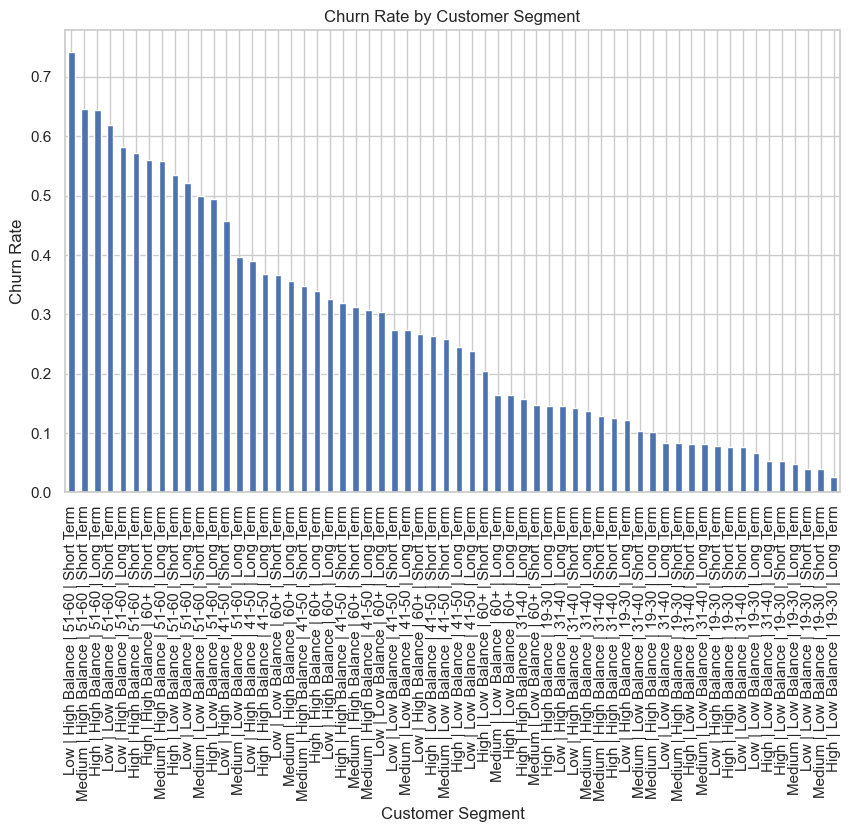

In [525]:
plt.figure(figsize=(10, 6))
churn_by_segment.sort_values(ascending=False).plot(kind='bar')
plt.title('Churn Rate by Customer Segment')
plt.ylabel('Churn Rate')
plt.xlabel('Customer Segment')
plt.show()

In [529]:
comb_df.to_csv('Cleaned BankChurn Dataset.csv')